In [51]:
using Symbolics
using LinearAlgebra
using Latexify
using Plots
using LaTeXStrings

## Experimento

Hagamos el análisis de autovalores usando $\xi^{a}$ y $\xi^{ab}$ como variables.

$$
    T_0^{ab} = \frac{-2\chi_0}{\mu^3}\left(\mu g^{ab} - 4\xi^a \xi^b\right),
$$

$$
    T_1^{ab} =\chi_{1}\left[\frac{48\nu}{\mu^{5}}\xi^{a}\xi^{b}-\frac{24}{\mu^4}\xi^{(a}\ell^{b)}-\dfrac{6\nu}{\mu^{4}}g^{ab}+\dfrac{2}{\mu^{3}}\xi^{ab}\right]
$$

$$
    T_2^{ab} = \frac{\chi_2}{\mu^5}\left[48\xi^{cd}\xi_{cd} - \frac{960\ell^c\ell_c}{\mu} + \frac{2880\nu^2}{\mu^2}\right]\xi^a\xi^b
    + \frac{\chi_2}{\mu^4}\left[-6\xi^{cd}\xi_{cd} + \frac{96\ell^c\ell_c}{\mu} - \frac{240\nu^2}{\mu^2}\right] g^{ab} \\
    + \frac{384\chi_2\xi^{(a}\xi^{b)c}\ell_c}{\mu^5} - \frac{1920\chi_2\nu\xi^{(a}\ell^{b)}}{\mu^6}
    + \frac{192\chi_2\ell^a\ell^b}{\mu^5} + \frac{96\chi_2\nu\xi^{ab}}{\mu^5} - \frac{24\chi_2\xi^{ac}\xi^b{}_c}{\mu^4}
$$

con $\ell^a = \xi^{ac}\xi_{c}$, $\nu = \ell^{a}\xi_{a}$.

$$
A_1^{abc}=\dfrac{\chi_1}{\mu^3}\left[g^{ab}\xi^{c}+g^{ac}\xi^{b}+g^{bc}\xi^{a}-\dfrac{6}{\mu}\xi^{a}\xi^{b}\xi^{c}\right]
$$

$$
A_2^{abc} =\dfrac{\chi_{2}}{\mu^3}
    \left[ \xi^{a}
        \left(\dfrac{-12}{\mu}\xi^{bc}+\dfrac{192}{\mu^2}
            \left(\xi^{(b}\ell^{c)}-\dfrac{\nu}{4}g^{bc}\right)
        -\dfrac{120}{\mu^{3}}
            \left(\xi^{b}\xi^{c}-\dfrac{\mu}{4}g^{bc}\right)
        \nu\right)\right.
    \\ 
    -\dfrac{24}{\mu}
        \left(g^{a(b}\ell^{c)}+\xi^{(b}\xi^{c)a}-\dfrac{1}{2}g^{bc}\ell^{a}\right)
    \\
    +\left. \dfrac{96}{\mu^{2}}
        \left(\ell^{a}
            \left(\xi^{b}\xi^{c}-\dfrac{\mu}{4}g^{bc}\right)
        +\nu
            \left(g^{a(b}\xi^{c)}-\dfrac{1}{4}\xi^{a}g^{bc}\right)
        \right)
    \right]
$$

48.0

Este Notebook está pensado para correr el Principal Alt, pero usando únicamente las variables abstractas. La idea es ver si podemos hacer andar bien las velocidades acá, y chequear errores en el código con variables de fluidos.

In [150]:
#Esta función calcula las variables conservativas a partir de las abstractas.

function ξ2c!(R,ξ,con,p) 
    g00 = -1.0
    g11 = 1.0
    g01 = 0.0
    g10 = 0.0

    ξ0 = ξ[1]
    ξ1 = ξ[2]
    ξ00 = ξ[3]
    ξ01 = ξ[4]
    ξ10 = ξ[4]
    ξ11 = ξ[5]

    #ν = ξ^abξ_aξ_b
    ν = ξ00*ξ0*ξ0 + 2.0*ξ01*(-ξ0)*ξ1 + ξ11*ξ1*ξ1
    #ξab2 = ξ^abξ_ab
    ξab2 = ξ00*ξ00 - 2.0 * ξ01*ξ01 + ξ11*ξ11
    #la = ξ^abξ_b
    l0 = ξ00*(-ξ0) + ξ01*ξ1
    l1 = ξ10*(-ξ0) + ξ11*ξ1

    μ = g00*ξ0^2 + g11*ξ1^2
    
    χ₀ = p[1]
    χ₁ = p[2]
    χ₂ = p[3]
    #Tab
    #Zero Order
    T00_0 = -2*χ₀/μ^3*(μ*g00-4*ξ0*ξ0)
    T01_0 = -2*χ₀/μ^3*(-4*ξ0*ξ1)
    #First Order
    T00_1 = χ₁*(48*ν*ξ0*ξ0/μ^5 - 24*(   ξ0*l0   )/μ^4 - 6*ν*g00/μ^4 + 2*ξ00/μ^3)
    T01_1 = χ₁*(48*ν*ξ0*ξ1/μ^5 - 12*(ξ0*l1+ξ1*l0)/μ^4 + 2*ξ01/μ^3)
    #Second Order
    T00_2 = χ₂/μ^5 * (48 * ξab2 - 960*(-l0*l0+l1*l1)/μ + 2880*ν^2/μ^2)ξ0*ξ0
            + χ₂/μ^4 * (-6 * ξab2 + 96*(-l0*l0+l1*l1)/μ - 240*ν^2/μ^2)*g00
            + 384*χ₂*ξ0*(-ξ00*l0 + ξ01*l1)/μ^5
            -1920*χ₂*ν*ξ0*l0/μ^6
            +192*χ₂*l0*l0/μ^5
            +96*χ₂*ν*ξ00/μ^5
            -24*χ₂*(-ξ00*ξ00+ξ01*ξ01)/μ^4
    T01_2 = χ₂/μ^5 * (48 * ξab2 - 960*(-l0*l0+l1*l1)/μ + 2880*ν^2/μ^2)ξ0*ξ1
            + 192*χ₂/(μ^5)*(ξ0*(ξ01*l0+ξ11*l1)+ξ1*(ξ00*l0+ξ01*l1))
            -960*χ₂*ν*(ξ0*l1+ξ1*l0)/μ^6
            +192*χ₂*l0*l1/μ^5
            +96*χ₂*ν*ξ01/μ^5
            -24*χ₂*(ξ00*ξ01*g00+ξ01*ξ11*g11)/μ^4

   
    A000_1 = χ₁/μ^3*(3*g00*ξ0 - 6*ξ0^3/μ)
    A001_1 = χ₁/μ^3*(g00*ξ1 - 6*ξ0^2*ξ1/μ)
    A011_1 = χ₁/μ^3*(g11*ξ0 - 6*ξ1^2*ξ0/μ)
                
    A000_2 = χ₂/(μ^3)*(
            ξ0*(-12*ξ00/μ + 192/(μ^2)*(ξ0*l0 - ν/4*g00) - 120*(ξ0*ξ0-μ*g00/4)*ν/μ^3)
                -24/μ*(g00*l0 + ξ0*ξ00 - 1/2*(g00*l0))
            +96/μ^2 * (l0*(ξ0*ξ0 - μ*g00/4) + ν*(g00*ξ0 - 1/4*ξ0*g00))
            )
            
    A001_2 = χ₂/(μ^3)*(
            ξ0*(-12*ξ01/μ + 96/(μ^2)*(ξ0*l1 + ξ1*l0) - 120*(ξ0*ξ1)*ν/μ^3)
                -12/μ*(g00*l1 + (ξ0*ξ01 + ξ1*ξ00))
            +96/μ^2 * ((l0*(ξ0*ξ1) + ν*(g00*ξ1/2)))
            )
            
                
    A011_2 = χ₂/(μ^3)*(
                ξ0*(-12*ξ11/μ + 192/(μ^2)*(ξ1*l1 - ν/4*g11) - 120*(ξ1*ξ1-μ*g11/4)*ν/μ^3)
                    -24/μ*(ξ1*ξ01 - 1/2*(g11*l0))
                +96/μ^2 * (l0*(ξ1*ξ1 - μ*g11/4) + ν*(- 1/4*ξ0*g11))
                )
            
    R[1] = - con[1] + T00_0   + T00_1  + T00_2 #T00
    R[2] = - con[2] + T01_0   + T01_1  + T01_2 #T01
    R[3] = - con[3] + A000_1  + A000_2         #A000
    R[4] = - con[4] + A001_1  + A001_2         #A001
    R[5] = - con[5] + A011_1  + A011_2         #A011
    return R[:]
end

ξ2c! (generic function with 1 method)

In [134]:
#En esta celda, calculo el jacobiano de la transformación de fluidos a abstractas
@variables ξ_symb[1:5], c_symb[1:5], χ_symb[1:3], R_symb[1:5]

ξ_symb_sca = Symbolics.scalarize(ξ_symb)
c_symb_sca = Symbolics.scalarize(c_symb)
R_symb_sca = Symbolics.scalarize(R_symb)
χ_symb_sca = Symbolics.scalarize(χ_symb)


JS_alt = Symbolics.jacobian(ξ2c!(R_symb_sca,ξ_symb_sca,c_symb_sca,χ_symb_sca),ξ_symb);
J_exp_alt = Symbolics.build_function(JS_alt, R_symb, ξ_symb, c_symb, χ_symb);
Jξ2c = eval(J_exp_alt[1]);


In [135]:
#Este es el flujo, pero calculado utilizando variables abstractas. Pareciera que la parte de Tab a primer orden está bien,
#pero como veremos más adelante, habría algun problema con las partes con A^{abc}
function Flux_imp_abstract!(Fl, ξ,con,p)
    ξ0 = ξ[1]
    ξ1 = ξ[2]
    ξ00 = ξ[3]
    ξ01 = ξ[4]
    ξ10 = ξ[4]
    ξ11 = ξ[5]

    #ν = ξ^abξ_aξ_b
    ν = ξ00*ξ0*ξ0 + 2.0*ξ01*(-ξ0)*ξ1 + ξ11*ξ1*ξ1
    #ξab2 = ξ^abξ_ab
    ξab2 = ξ00*ξ00 - 2.0 * ξ01*ξ01 + ξ11*ξ11
    #la = ξ^abξ_b
    l0 = ξ00*(-ξ0) + ξ01*ξ1
    l1 = ξ10*(-ξ0) + ξ11*ξ1
    g00 = -1.0
    g11 = 1.0
    g01 = 0.0
    g10 = 0.0

    μ = g00*ξ0^2 + g11*ξ1^2
    
    χ₀ = p[1]
    χ₁ = p[2]
    χ₂ = p[3]
    

    T11_0 = -2*χ₀/μ^3*(μ*g11 - 4*ξ1*ξ1)
    T11_1 = χ₁*(48*ν*ξ1*ξ1/μ^5 - 24*ξ1*l1/μ^4 - 6*ν*g11/μ^4 + 2*ξ11/μ^3)
    T11_2 = χ₂/μ^5 * (48 * ξab2  - 960*(-l0*l0+l1*l1)/μ + 2880*ν^2/μ^2)ξ1*ξ1
            + χ₂/μ^4 * (-6 * ξab2  + 96*(-l0*l0+l1*l1)/μ - 240*ν^2/μ^2)*g11
            + 384*χ₂*ξ1*(-ξ01*l0 + ξ11*l1)/μ^5
            -1920*χ₂*ν*ξ1*l1/μ^6
            +192*χ₂*l1*l1/μ^5
            +96*χ₂*ν*ξ11/μ^5
            -24*χ₂*(-ξ01*ξ01 + ξ11*ξ11)/μ^4
    A111_1 = χ₁/(μ^3)*(3*g11*ξ1 - 6*ξ1^3/μ)
    A111_2 = χ₂/(μ^3)*(ξ1*(-12*ξ11/μ + 192/(μ^2)*(ξ1*l1 - ν/4*g11) - 120*(ξ1*ξ1-μ*g11/4)*ν/μ^3)
                    -24/μ*(g11*l1 + ξ1*ξ11 - 1/2*(g11*l1))
                    +96/μ^2 * (l1*(ξ1*ξ1 - μ*g11/4) + ν*(g11*ξ1 - 1/4*ξ1*g11))
                  )

    Fl[1] = con[2] 
    Fl[2] = T11_0 + T11_1 + T11_2
    Fl[3] = con[4]
    Fl[4] = con[5] 
    Fl[5] = A111_1 + A111_2
    return -Fl[:]
end

Flux_imp_abstract! (generic function with 1 method)

In [137]:
#Aquí calculo los jacobianos del flujo respecto tanto a las variables abstractas como a las conservativas
@variables ξ_symb[1:5], c_symb[1:5], χ_symb[1:3], Fl_symb[1:5]

ξ_symb_sca = Symbolics.scalarize(ξ_symb)
c_symb_sca = Symbolics.scalarize(c_symb)
Fl_symb_sca = Symbolics.scalarize(Fl_symb)
χ_symb_sca = Symbolics.scalarize(χ_symb)

#==#
JFS_ξ = Symbolics.jacobian(Flux_imp_abstract!(Fl_symb_sca, ξ_symb_sca,c_symb_sca,χ_symb_sca),ξ_symb)
JFS_c = Symbolics.jacobian(Flux_imp_abstract!(Fl_symb_sca, ξ_symb_sca,c_symb_sca,χ_symb_sca),c_symb);

JF_ξ_exp = Symbolics.build_function(JFS_ξ, Fl_symb_sca, ξ_symb, c_symb, χ_symb);
JF_c_exp = Symbolics.build_function(JFS_c, Fl_symb_sca, ξ_symb, c_symb, χ_symb);

JFac_ξ = eval(JF_ξ_exp[1]);
JFac_c = eval(JF_c_exp[1]);


In [138]:
#Finalmente, la derivada total del flujo respecto a las conservativas.
PC(r,fl,ξ,c,χ) =  JFac_ξ(fl,ξ,c,χ)*inv(Jξ2c(r,ξ,c,χ)) + JFac_c(fl,ξ,c,χ) #var conserv


PC (generic function with 1 method)

In [151]:
#Aquí calculamos las velocidades de propagación a velocidad 0. Dan bien, lo cual es prometedor.
#Sin embargo, veremos problemas más adelante
#The propagations speeds should be +-1/sqrt(3), +-sqrt(3/5) and zero

re = zeros(5)
fl = zeros(5)
flu=[-1.;0.0;0.0;0.0;0.0];
v = flu[2]
μ = flu[1]
γ = 1/sqrt(1-v^2)
v_vec = [γ, γ*v]
ξ0 = v_vec[1]*sqrt(-μ)
ξ1 = v_vec[2]*sqrt(-μ)
ξ = [ξ0, ξ1, 0, 0, 0]

par_f = [-1.,0.0,-1.]
con = ξ2c!(re,ξ,zeros(5), par_f);
display(PC(re,fl,ξ,con,par_f))
fulleigenvals = eigvals(PC(re,fl,ξ,con,par_f))
println("Eigenvalues = ")
for i in 1:5
    println(fulleigenvals[i])
end
println("flu = ", flu)
println("sqrt(1/3) = $(sqrt(1/3))")
println("sqrt(3/5) = $(sqrt(3/5))")

5×5 Matrix{Float64}:
  0.0       -1.0  0.0   0.0   0.0
 -0.333333   0.0  0.0   0.0   0.0
  0.0        0.0  0.0  -1.0   0.0
  0.0        0.0  0.0   0.0  -1.0
  0.0        0.0  0.0  -0.6   0.0

Eigenvalues = 
-0.7745966692414833
-0.5773502691896256
0.0
0.5773502691896258
0.7745966692414834
flu = [-1.0, 0.0, 0.0, 0.0, 0.0]
sqrt(1/3) = 0.5773502691896257
sqrt(3/5) = 0.7745966692414834


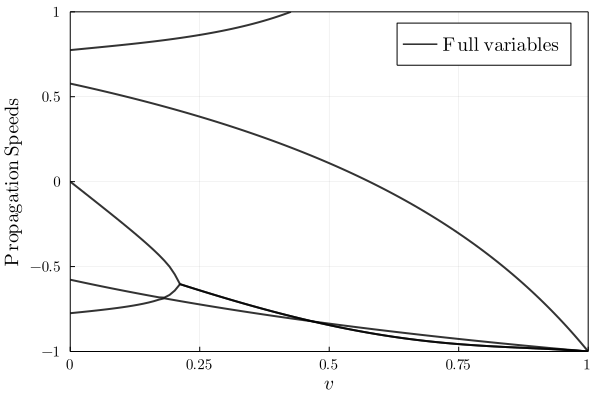

In [152]:
#Graficamos las velocidades de propagación
using Plots
N = 100
μ = -1.0
v_list = zeros(N)

fullEig = fill(0.0+0.0im,(5,N))

for i in 1:N
    v = (i-1)/(N-1)/1.001
    v_list[i] = v
    γ = 1/sqrt(1-v^2)
    v_vec = [γ, γ*v]
    ξ0 = v_vec[1]*sqrt(-μ)
    ξ1 = v_vec[2]*sqrt(-μ)
    ξ = [ξ0, ξ1,0,0,0]

    par_f = [-1.,0.0,-1.]
    re = zeros(5)
    fl = zeros(5)
    con = ξ2c!(re,ξ,zeros(5), par_f);

    fullEig[:,i] = eigvals(PC(re,fl,ξ,con,par_f))
end
one(x)=1
plt = plot(framestyle = :box, xlabel = L"v", ylabel = L"\textrm{Propagation\;Speeds}", labelfontsize = 13, 
            legendfontsize = 13, tickfontsize=10, ticksize = 10)
γ = (1 .- v.^2).^(-1//2)

for k in 1:5
    plot!(plt, v_list,real(fullEig[k,:]), lw = 2, color = :black, alpha = 0.8, label = (k == 1 ? L"\textrm{Full\;variables}" : ""))
    #plot!(plt, v,real(fullEig2[k,:]), lw = 2, color = :red, alpha = 0.8, label = (k == 1 ? L"\textrm{Full\;variables\;2}" : ""))
end
ylims!(-1,1)
xlims!(0,1)
yticks!([-1,0,1, -0.5, 0.5], [L"-1", L"0", L"1", L"-0.5", L"0.5"])
xticks!([0, 0.25, 0.5, 0.75, 1], [L"0", L"0.25", L"0.5", L"0.75", L"1"])

Las dos cuvas que parten desde 

In [140]:
JFac_ξ(fl,ξ,con,par_f)

5×5 Matrix{Float64}:
 0.0       0.0       0.0       0.0      0.0
 8.52759  -2.46082   0.0       0.0      0.0
 0.0       0.0       0.0       0.0      0.0
 0.0       0.0       0.0       0.0      0.0
 0.0       0.0      -5.60508  40.2261  -7.5847

In [141]:
inv(Jξ2c(re,ξ,con,par_f))

5×5 Matrix{Float64}:
 -0.0441175  0.0210503   0.0          0.0         -0.0
 -0.0210503  0.12731     0.0          0.0         -0.0
  0.0        0.0        -0.0069522   -0.00153127   0.00131913
  0.0        0.0        -0.00293156  -0.0184819    0.0118572
  0.0        0.0        -0.0294557   -0.0163201    0.0853722

In [142]:
JFac_ξ(fl,ξ,con,par_f)#*inv(Jξ2c(re,ξ,con,par_f))

5×5 Matrix{Float64}:
 0.0       0.0       0.0       0.0      0.0
 8.52759  -2.46082   0.0       0.0      0.0
 0.0       0.0       0.0       0.0      0.0
 0.0       0.0       0.0       0.0      0.0
 0.0       0.0      -5.60508  40.2261  -7.5847

In [143]:
Jξ2c(re,ξ,con,par_f)

5×5 Matrix{Float64}:
 -24.6082   4.06888     0.0       0.0       0.0
  -4.06888  8.52759     0.0       0.0       0.0
   0.0      0.0      -151.779    11.9727    0.682331
   0.0      0.0       -10.8532  -60.8142    8.6141
   0.0      0.0       -54.4425   -7.49456  13.5955

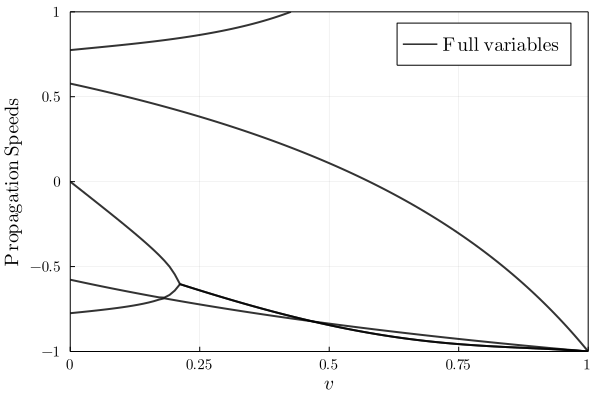

In [144]:
using Plots
N = 100
μ = -1.0
v_list = zeros(N)

fullEig = fill(0.0+0.0im,(5,N))

for i in 1:N
    v = (i-1)/(N-1)/1.001
    v_list[i] = v
    γ = 1/sqrt(1-v^2)
    v_vec = [γ, γ*v]
    ξ0 = v_vec[1]*sqrt(-μ)
    ξ1 = v_vec[2]*sqrt(-μ)
    ξ = [ξ0, ξ1,0,0,0]

    par_f = [-1.,0.0,-1.]
    re = zeros(5)
    fl = zeros(5)
    con = ξ2c!(re,ξ,zeros(5), par_f);

    fullEig[:,i] = eigvals(PC(re,fl,ξ,con,par_f))
end
one(x)=1
plt = plot(framestyle = :box, xlabel = L"v", ylabel = L"\textrm{Propagation\;Speeds}", labelfontsize = 13, 
            legendfontsize = 13, tickfontsize=10, ticksize = 10)
γ = (1 .- v.^2).^(-1//2)

for k in 1:5
    plot!(plt, v_list,real(fullEig[k,:]), lw = 2, color = :black, alpha = 0.8, label = (k == 1 ? L"\textrm{Full\;variables}" : ""))
    #plot!(plt, v,real(fullEig2[k,:]), lw = 2, color = :red, alpha = 0.8, label = (k == 1 ? L"\textrm{Full\;variables\;2}" : ""))
end
ylims!(-1,1)
xlims!(0,1)
yticks!([-1,0,1, -0.5, 0.5], [L"-1", L"0", L"1", L"-0.5", L"0.5"])
xticks!([0, 0.25, 0.5, 0.75, 1], [L"0", L"0.25", L"0.5", L"0.75", L"1"])
display(plt)